In [1]:
# 특성 맵 시각화
%pip install keras
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 56.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 코드 5-32 필요한 라이브러리 호출
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2024-12-03 01:20:40.691929: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:20:40.694130: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:20:40.699946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733156440.709202   90992 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733156440.711895   90992 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:20:40.722257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# 코드 5-33 새로운 모델 생성
"""
This script creates a new Sequential model using TensorFlow's Keras API. The model consists of the following layers:

1. Conv2D: A convolutional layer with 32 filters, a kernel size of (5, 5), ReLU activation, and an input shape of (100, 100, 3).
2. MaxPooling2D: A max pooling layer.
3. Conv2D: A convolutional layer with 64 filters, a kernel size of (5, 5), and ReLU activation.
4. MaxPooling2D: A max pooling layer.
5. Conv2D: A convolutional layer with 64 filters, a kernel size of (5, 5), and ReLU activation.
6. MaxPooling2D: A max pooling layer.
7. Conv2D: A convolutional layer with 64 filters, a kernel size of (5, 5), and ReLU activation.
8. MaxPooling2D: A max pooling layer.
9. Flatten: A layer that flattens the input.
10. Dense: A fully connected layer with 128 units and ReLU activation.
11. Dense: A fully connected layer with 64 units and ReLU activation.
12. Dense: A fully connected layer with 32 units and ReLU activation.
13. Dense: A fully connected layer with 2 units and softmax activation.

The model summary is printed at the end.
"""
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            input_shape=(100, 100, 3), activation="relu", kernel_size=(5, 5), filters=32
        ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(activation="relu", kernel_size=(5, 5), filters=64),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(activation="relu", kernel_size=(5, 5), filters=64),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(activation="relu", kernel_size=(5, 5), filters=64),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(2, activation="softmax"),
    ]
)
model.summary()

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733156444.825878   90992 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,922 (1.15 MB)

 Trainable params: 301,922 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 코드 5-34 특성 맵 정의
# 모델 입력으로(None, 100, 100, 3)의 형태를 갖습니다.
ins = model.inputs
# 첫 번째 계층에 대한 출력으로(None, 96, 96, 32)의 형태를 갖습니다.
outs = model.layers[0].output
# ins와 outs를 모델 입력과 출력으로 사용하여 특성 맵을 정의합니다.
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432 (9.50 KB)

 Trainable params: 2,432 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

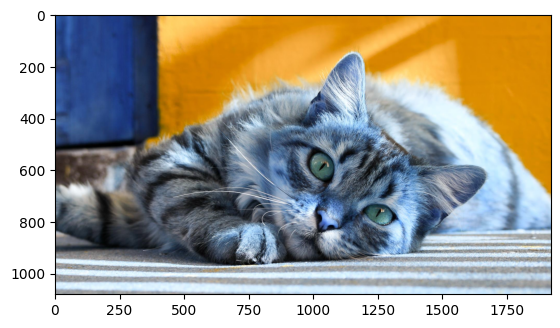

In [5]:
# 코드 5-35 이미지 호출
img = cv2.imread("../chap5/data/cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(1, 96, 96, 32)


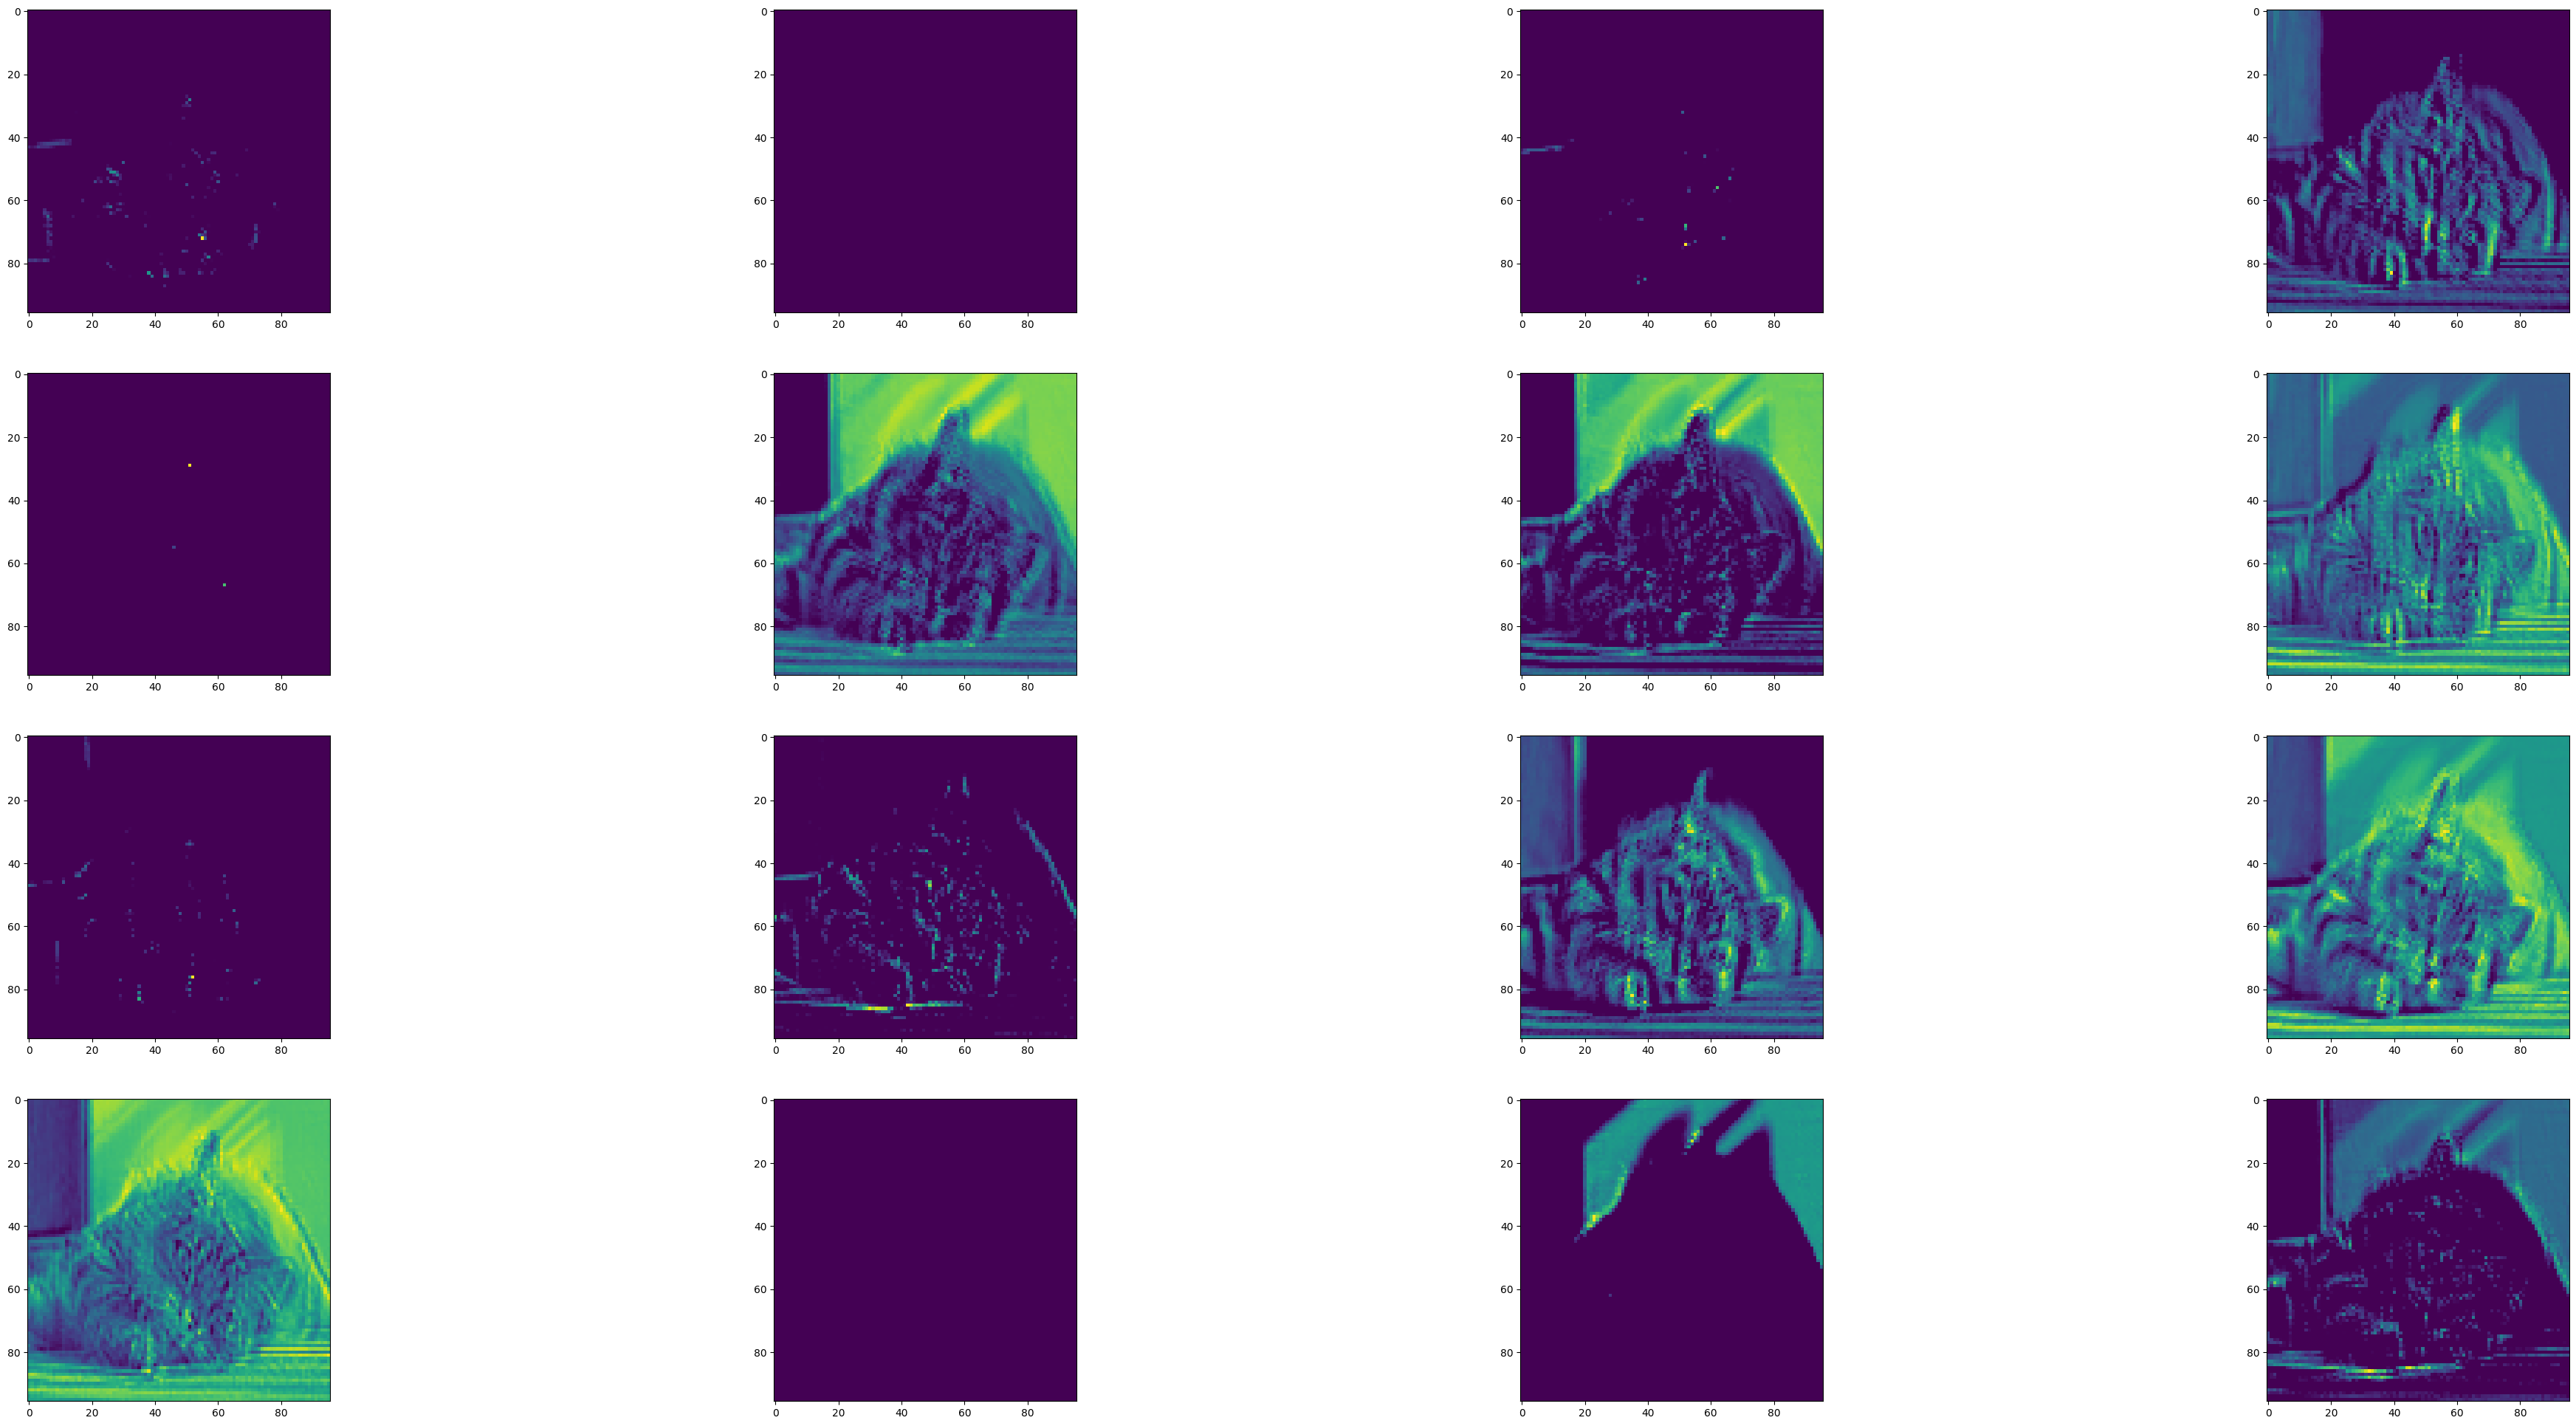

In [7]:
# 코드 5-36 이미지 전처리 및 특성 맵 확인
# 이미지 크기 조정
img = cv2.resize(img, (100, 100))
# 이미지 차원 조정
input_img = np.expand_dims(img, axis=0)
# 입력 이미지 형태 출력
print(input_img.shape)

# 이미지를 모델에 적용
feature = feature_map.predict(input_img)
# 특성 맵에 대한 형태 출력
print(feature.shape)
fig = plt.figure(figsize=(50, 50))
# 이미지 16개 출력
for i in range(16):
    # subplot(m, n, p)는 m×n 그리드로 나누고, p 로 지정된 위치에 좌표축을 만듭니다.
    ax = fig.add_subplot(8, 4, i + 1)
    ax.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


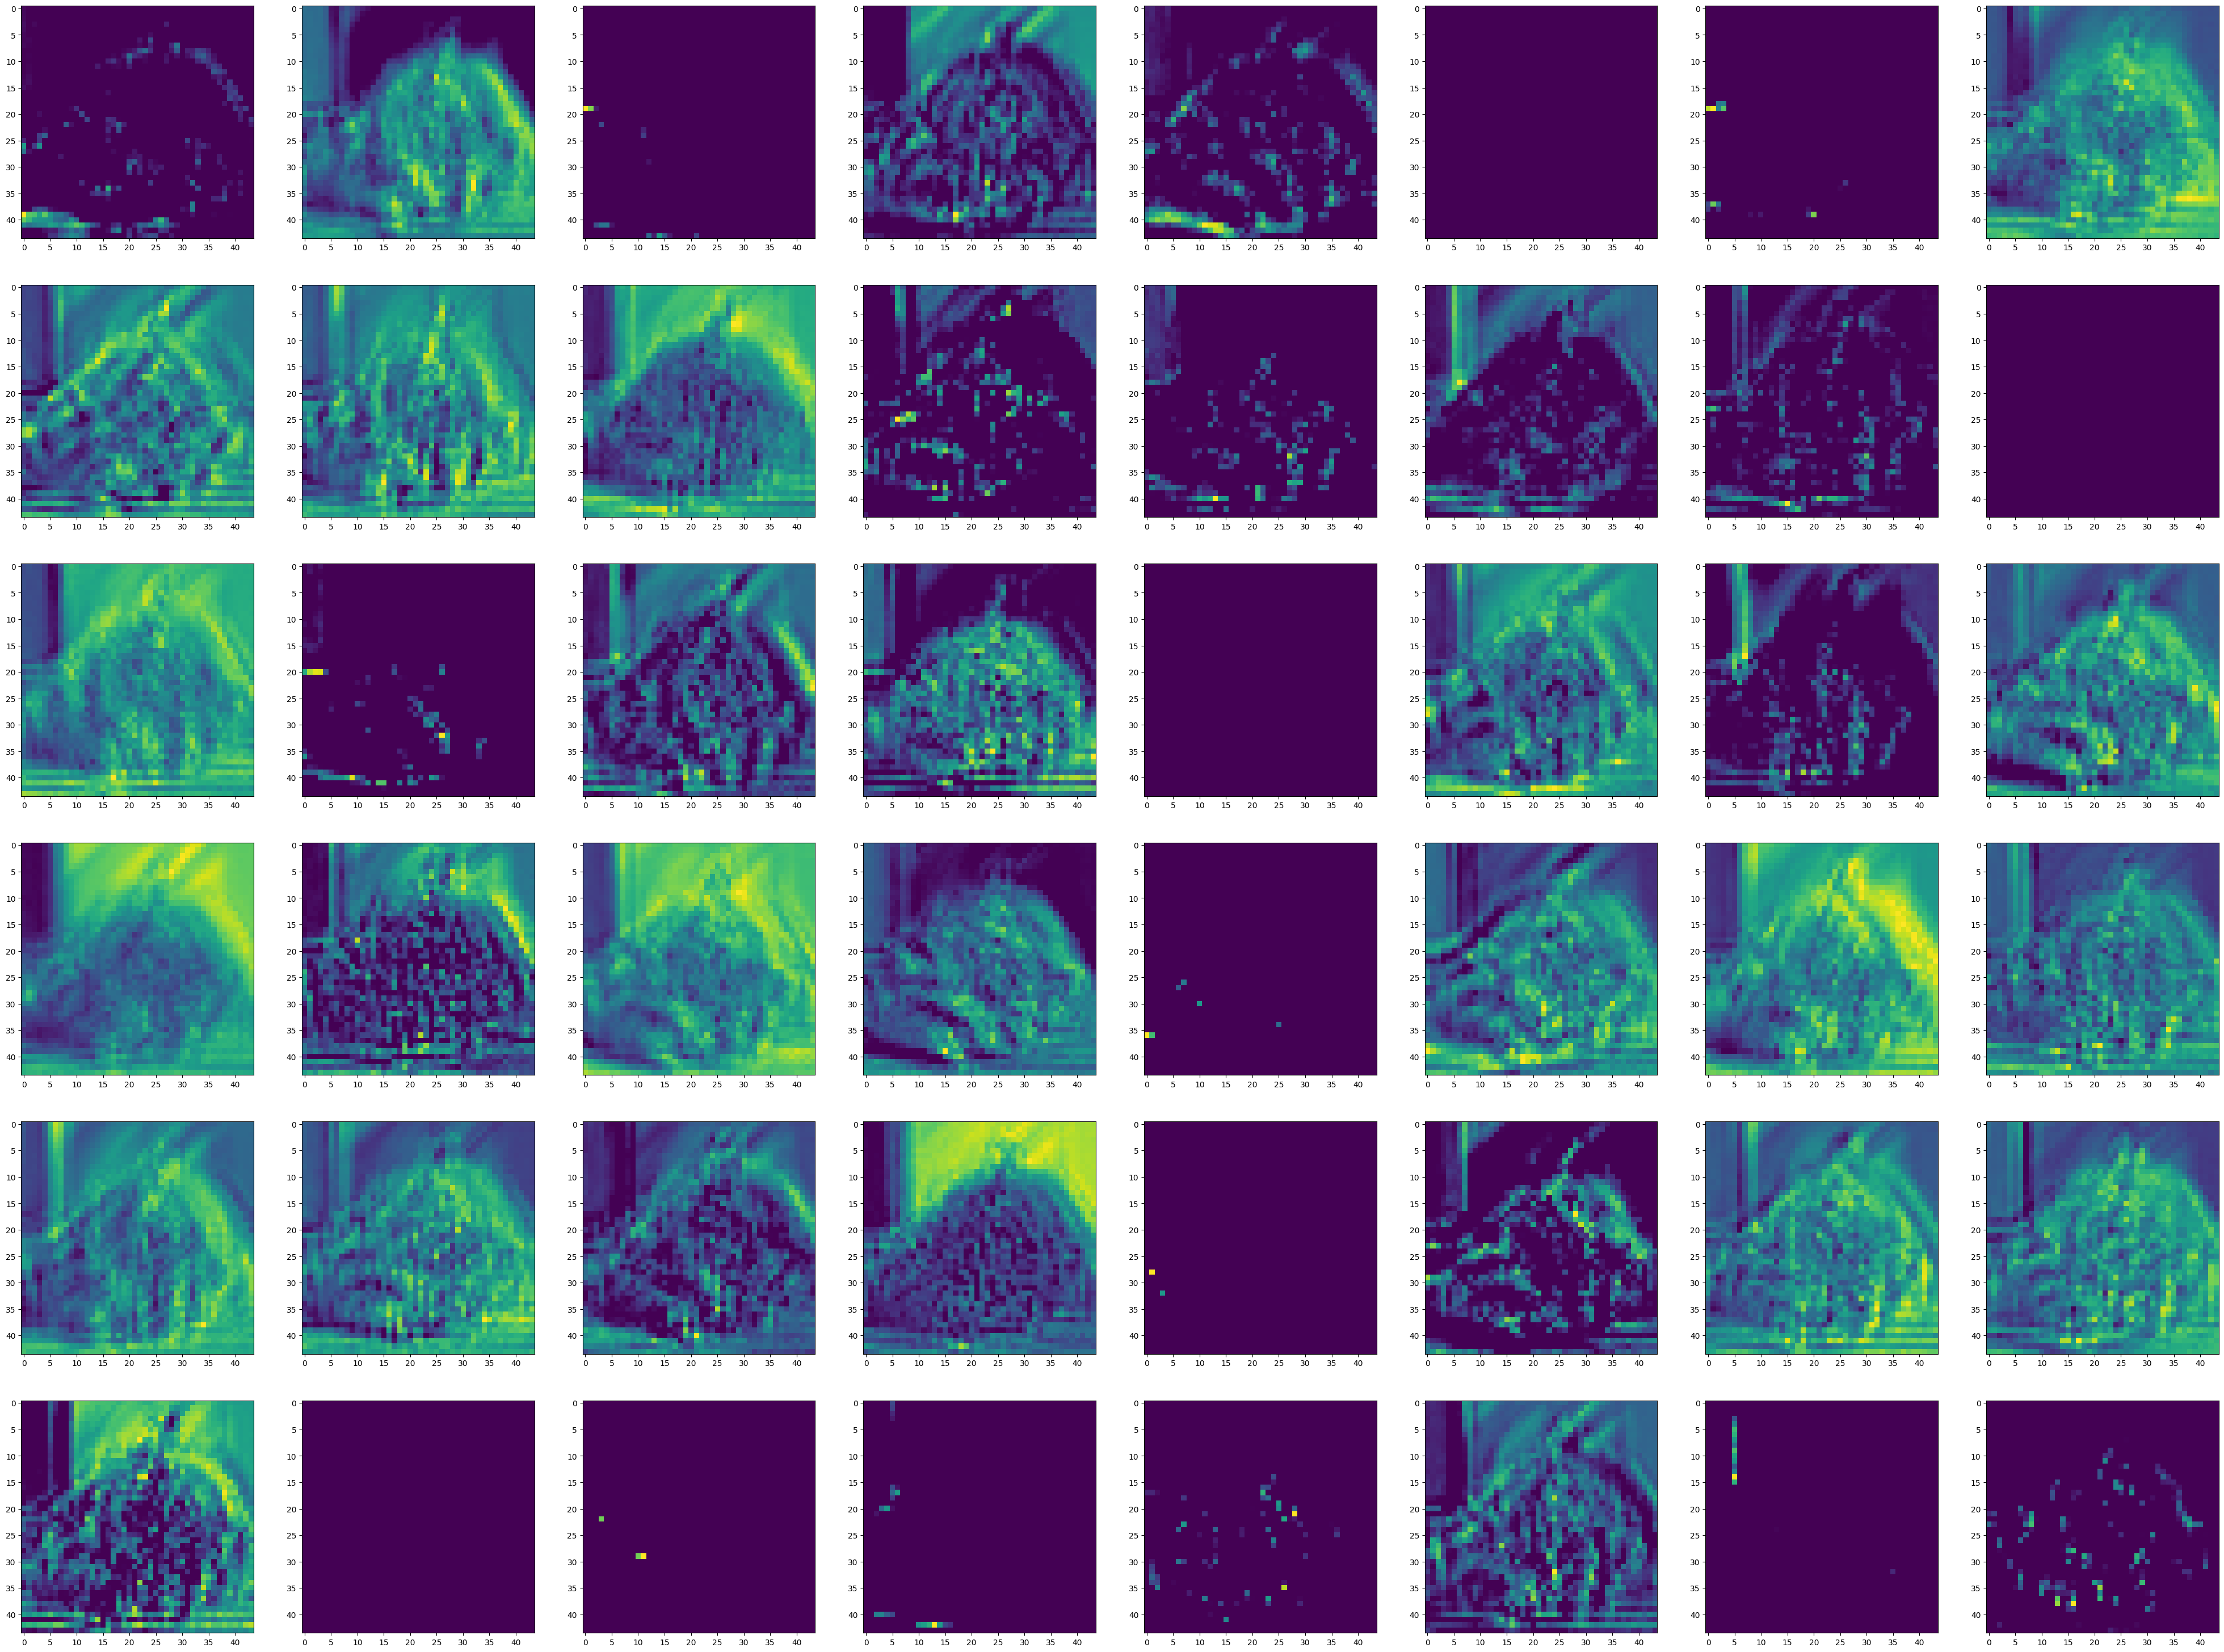

In [8]:
# 코드 5-37이미지를 모델에 적용
# 모델 입력으로 (None, 100, 100, 3)의 형태를 갖습니다.
ins = model.inputs
# 두 번째 계층에 대한 출력으로 (None, 1000)의 형태를 갖습니다.
outs = model.layers[2].output
# 앞서 정의한 ins와 outs를 모델 입력과 출력으로 전달합니다.
feature_map = Model(inputs=ins, outputs=outs)

# 이미지 호출
img = cv2.imread("../chap5/data/cat.jpg")
img = cv2.resize(img, (100, 100))
# 이미지 차원 조정
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))
# 이미지 48개 출력
for i in range(48):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


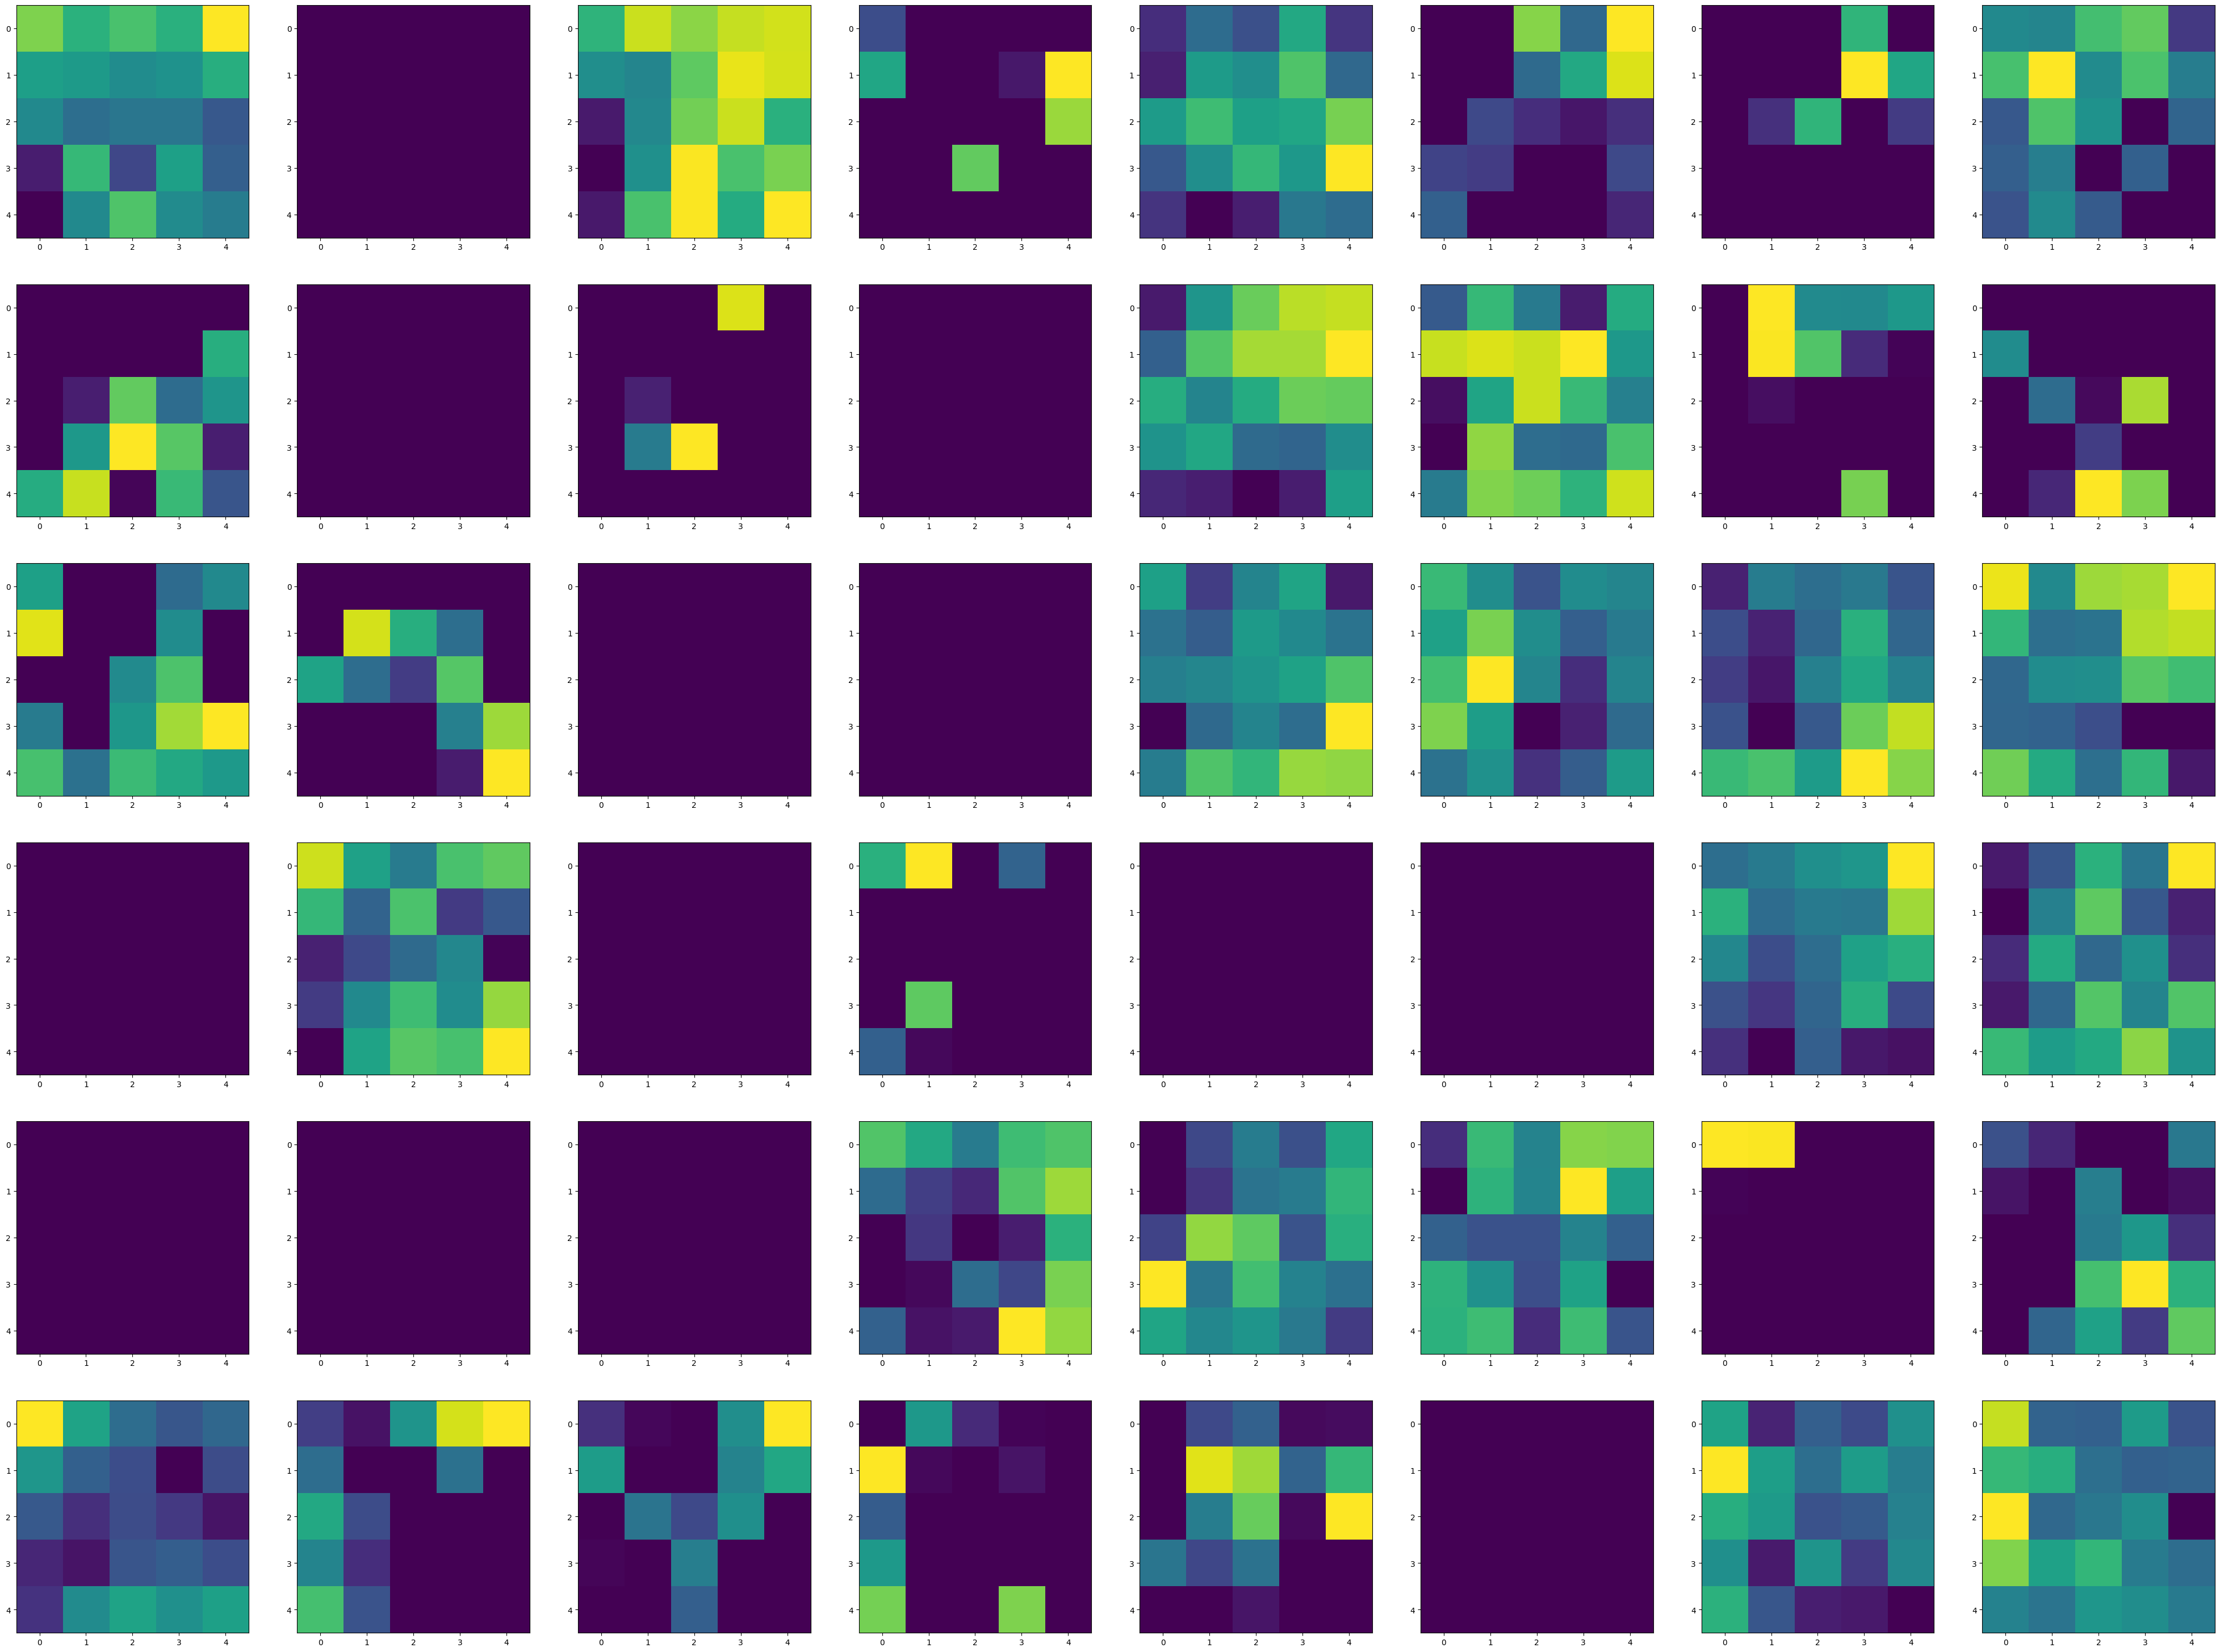

In [9]:
# 코드 5-38 이미지를 모델에 적용
# 모델 입력으로 (None, 100, 100, 3)의 형태를 갖습니다.
ins = model.inputs
# 여섯 번째 계층에 대한 출력으로 (None, 1000)의 형태를 갖습니다.
outs = model.layers[6].output
# 앞서 정의한 ins와 outs를 모델 입력과 출력으로 전달합니다.
feature_map = Model(inputs=ins, outputs=outs)

# 이미지 호출
img = cv2.imread("../chap5/data/cat.jpg")
img = cv2.resize(img, (100, 100))
# 이미지 차원 조정
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))
# 이미지 48개 출력
for i in range(48):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(feature[0, :, :, i])